In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import  OneHotEncoder
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import pickle

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


There are 10 features and 53940 records

In [3]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no NULL data, but x, y, z is a length there are no chances that length is 0 so we assumed that 0 in that features is null


In [4]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
x = (diamonds.x == 0).sum()
x

8

In [7]:
y = (diamonds.y == 0).sum()
y

7

In [8]:
z = (diamonds.z == 0).sum()
z

20

In [9]:
diamonds.loc[(diamonds[['z']]==0).all(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [10]:
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]
diamonds.shape

(53920, 10)

I dropped 20 records

## Univariate analysis

In [11]:
categorical = ["cut", "color", "clarity"]
numerical = ["carat", "depth", "table", "x", "y", "z"] # Price is our target

### Categorical features

           jumlah sampel  persentase
Ideal              21548        40.0
Premium            13780        25.6
Very Good          12081        22.4
Good                4902         9.1
Fair                1609         3.0


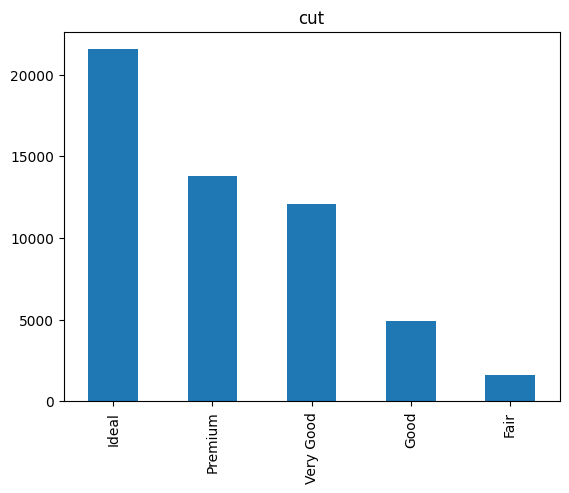

In [12]:
feature = categorical[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
G          11284        20.9
E           9797        18.2
F           9538        17.7
H           8298        15.4
D           6774        12.6
I           5421        10.1
J           2808         5.2


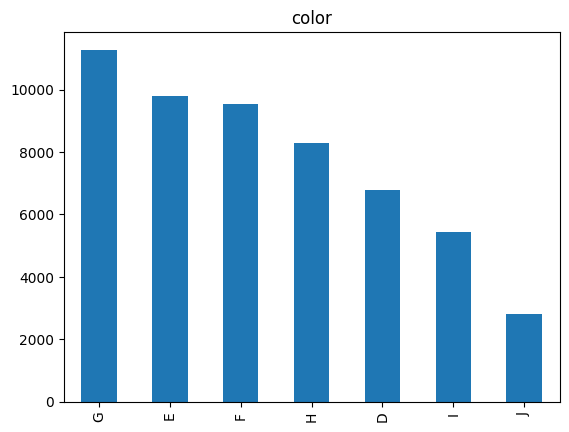

In [13]:
feature = categorical[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

      jumlah sampel  persentase
SI1           13063        24.2
VS2           12254        22.7
SI2            9185        17.0
VS1            8170        15.2
VVS2           5066         9.4
VVS1           3654         6.8
IF             1790         3.3
I1              738         1.4


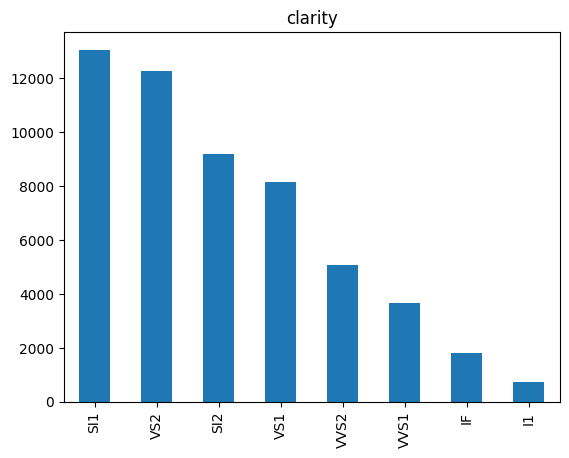

In [14]:
feature = categorical[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Numerical features

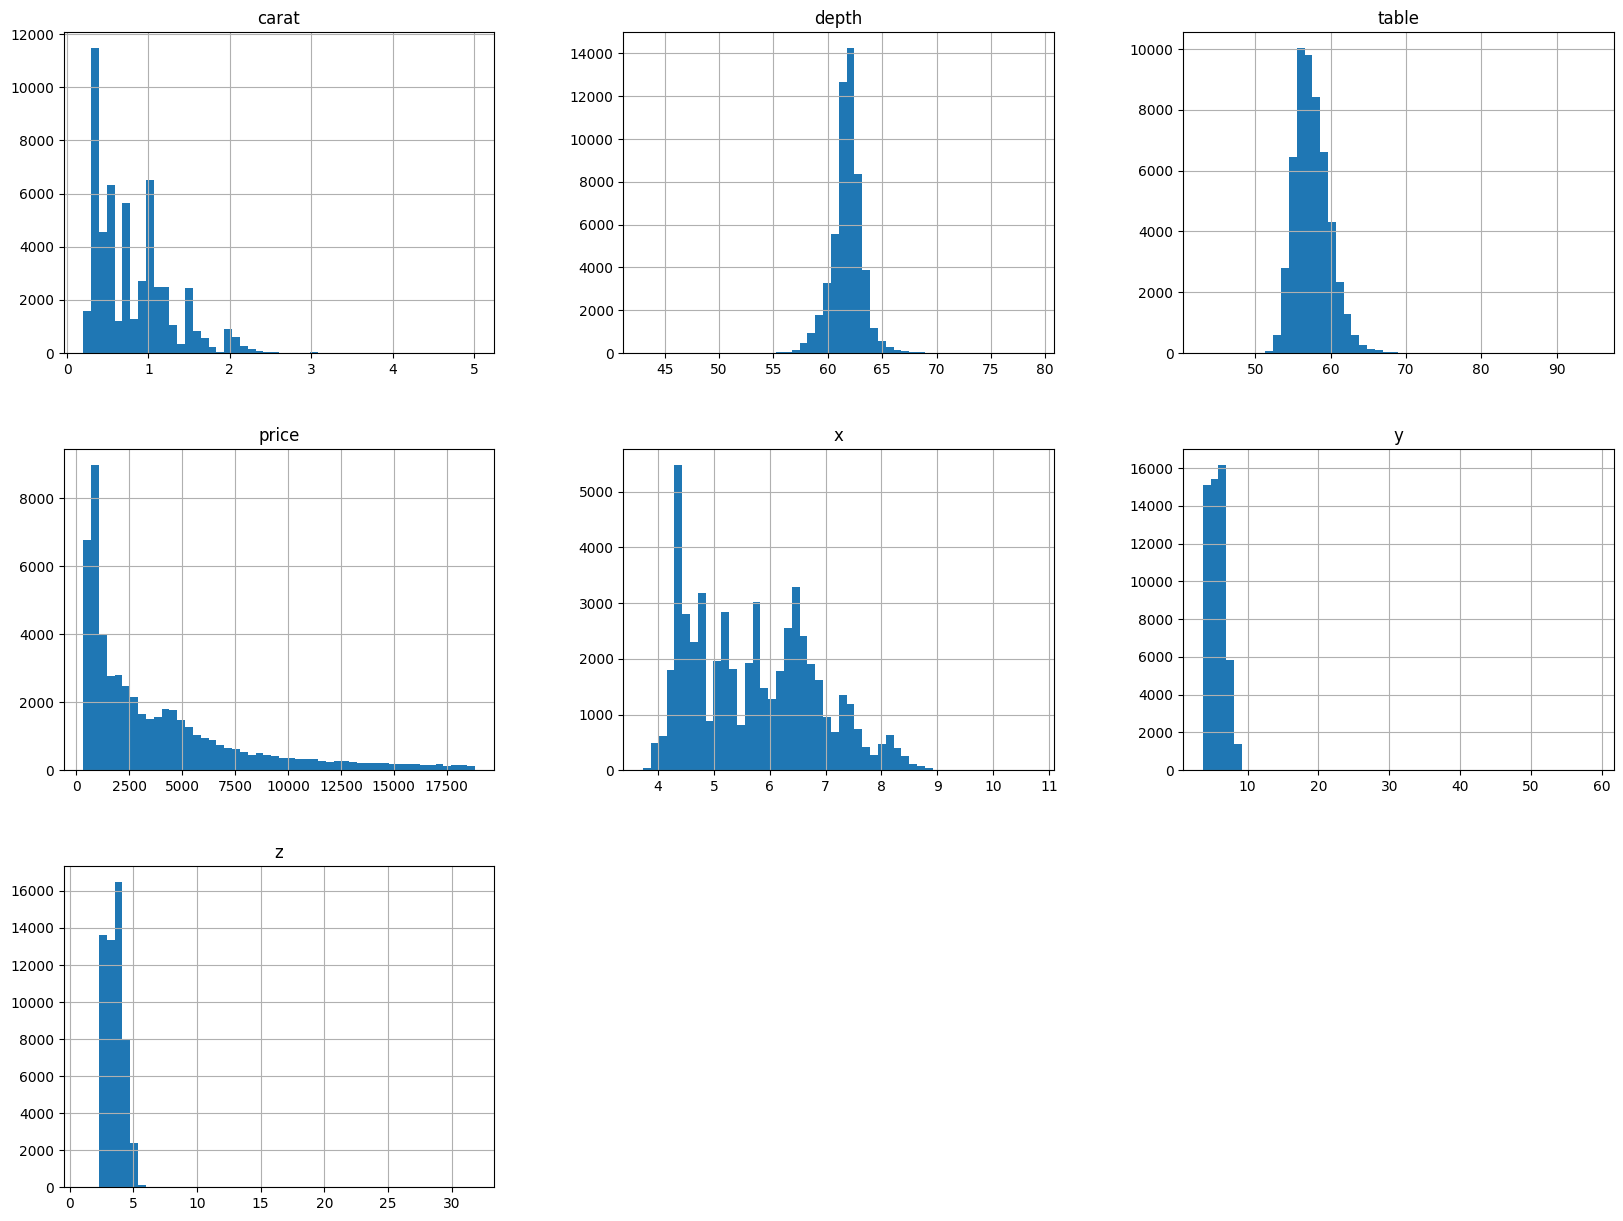

In [15]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate analysis

### Categorical

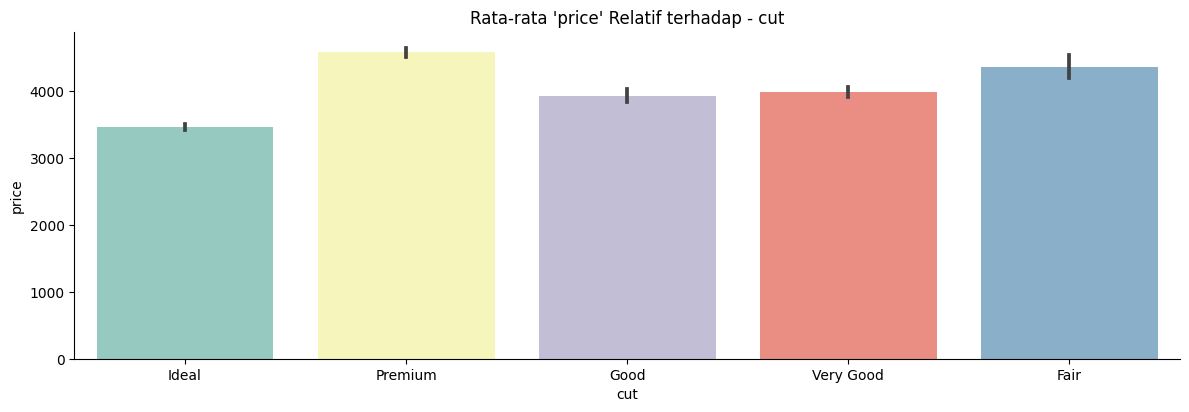

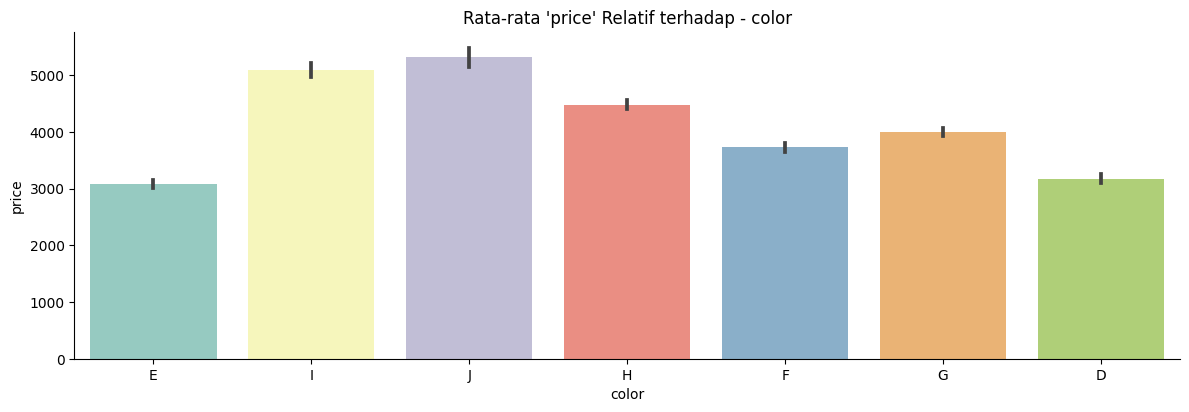

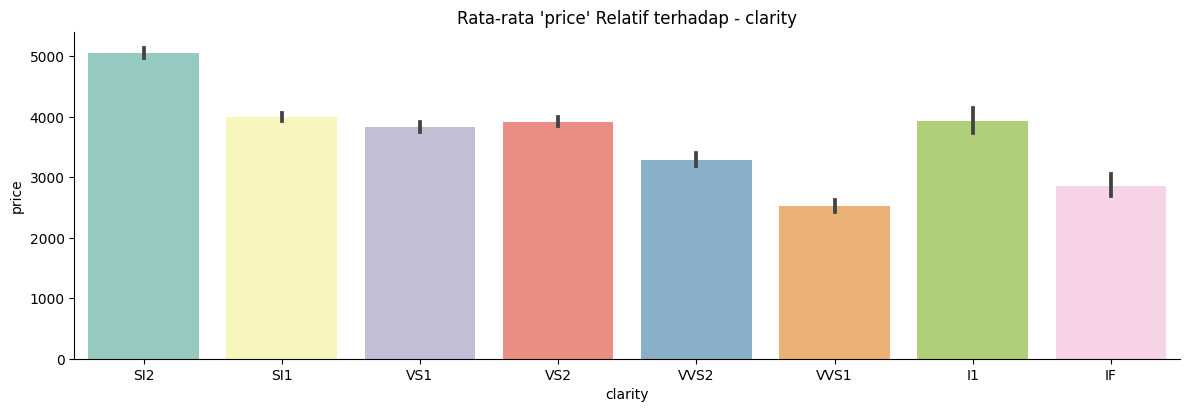

In [16]:
cat_features = diamonds.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

From that we can conclude that categorical features doesn't have a big effect for the price


### Numerical

<ipython-input-17-60bf56bcd2dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamonds.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix for numerical features ')

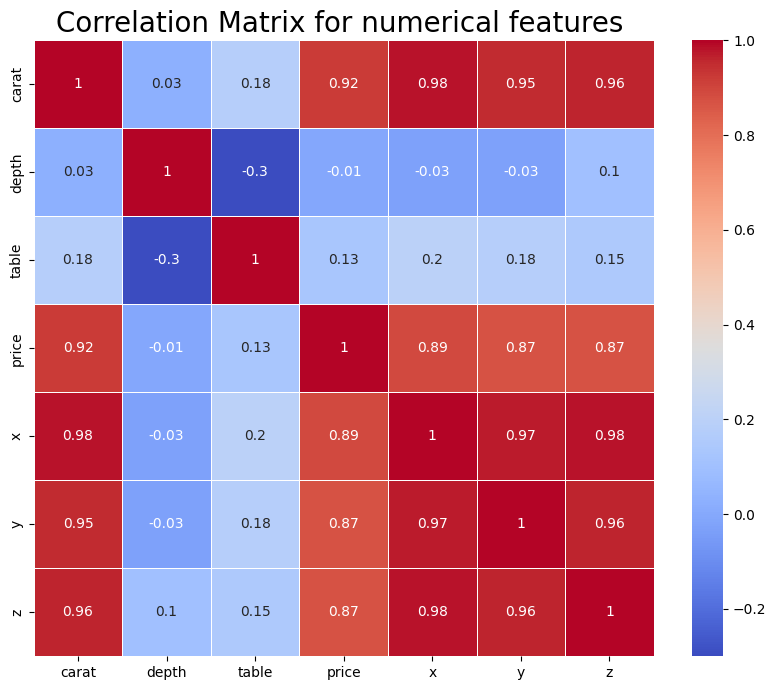

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix for numerical features ", size=20)

From that we can conclude that feature depth doesn't really effect price

In [18]:
diamonds.drop(['depth'], inplace=True, axis=1)

<ipython-input-18-d0136b328355>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds.drop(['depth'], inplace=True, axis=1)


In [19]:
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


In [20]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,65.0,327,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


## Dimensionality reduction from x, y, z to 'dimension'


In [21]:
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)


In [29]:
diamonds

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-2.735696
1,0.21,61.0,326,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.913605
2,0.23,65.0,327,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-2.660287
3,0.29,58.0,334,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.331754
4,0.31,58.0,335,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-2.115435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,57.0,2757,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.012295
53936,0.72,55.0,2757,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.010943
53937,0.70,60.0,2757,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,-0.074030
53938,0.86,58.0,2757,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.600603


## Split data

In [22]:
X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [24]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 53920
Total # of sample in train dataset: 48528
Total # of sample in test dataset: 5392


In [25]:
x_train

,carat,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
34240,0.40,58.0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-1.566545
12480,0.91,54.0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.789652
16878,1.01,57.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.076748
22014,1.50,57.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.459893
25960,1.57,56.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2.658129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15385,0.29,56.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,-2.283846
17739,1.50,63.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2.457866
28047,0.32,56.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,-2.008998
15733,1.21,58.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.797957


In [26]:
y_train

34240      855
12480     5252
16878     6734
22014    10080
25960    15144
         ...  
15385      607
17739     7140
28047      660
15733     6292
52754     2561
Name: price, Length: 48528, dtype: int64

## Normalize using StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

,carat,table,dimension
34240,-0.840062,0.241770,-0.906089
12480,0.233680,-1.552700,0.452972
16878,0.444217,-0.206848,0.618570
22014,1.475851,-0.206848,1.416372
25960,1.623228,-0.655465,1.530715


In [28]:
x_train[numerical_features].describe().round(4)

,carat,table,dimension
count,48528.0000,48528.0000,48528.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.2611,-6.4875,-1.8028
25%,-0.8401,-0.6555,-0.9028
50%,-0.2084,-0.2068,-0.0244
75%,0.5074,0.6904,0.7049
max,8.8657,9.6627,21.9570


The mean become 0 and std become 1

## Model

In [30]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## Using KNN

In [31]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(x_train), y_true=y_train)

## Random Forest

In [32]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)

## AdaBoost Regressor


In [33]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(x_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)

In [34]:
x_test.loc[:, numerical_features] = scaler.transform(x_test[numerical_features])

In [35]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3

# Panggil mse
mse

,train,test
KNN,462.824338,566.602526
RF,109.591201,301.12772
Boosting,1867.088768,1799.040057


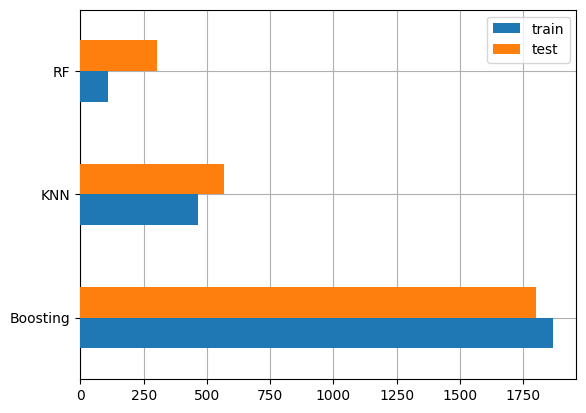

In [36]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [40]:
prediksi = x_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
47295,394,462.1,422.9,788.1


Random forest is the best one, so we tune the parameters


In [44]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)

    scores.append((n, mse))


In [48]:
scores

[(10, 340612.4455171401),
 (20, 324575.90319042193),
 (30, 317924.0652846901),
 (40, 312284.08410039777),
 (50, 310961.23030816746),
 (60, 308919.055415151),
 (70, 307662.396127711),
 (80, 307939.0764438379),
 (90, 307989.0529109427),
 (100, 308435.6882329104),
 (110, 309025.4012286838),
 (120, 308339.3779570463),
 (130, 308622.84960752033),
 (140, 308062.48058508104),
 (150, 308852.5373116311),
 (160, 308224.6476781546),
 (170, 308449.52741233615),
 (180, 308349.67705993773),
 (190, 308439.9615246739),
 (200, 307745.83412889804)]

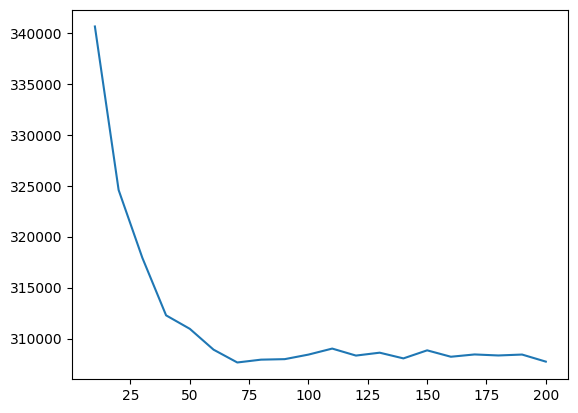

In [45]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'mse'])
plt.plot(df_scores.n_estimators, df_scores.mse)

In [52]:
max_depth = 70
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(x_train, y_train)

        y_pred = rf.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)

        scores.append((s, n, mse))

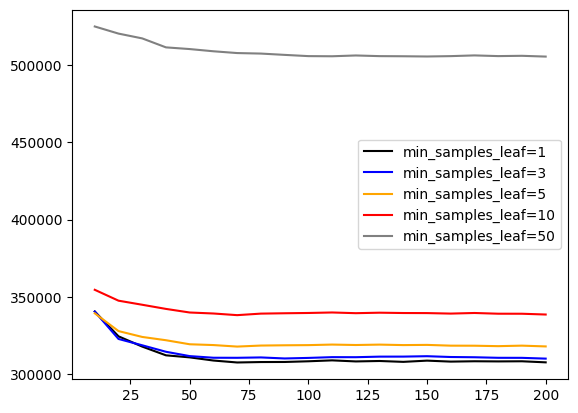

In [53]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [55]:
min_samples_leaf = 1
rf = RandomForestRegressor(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=70, n_estimators=200, random_state=1)

## Save the model

In [57]:
output_file = f'model.bin'
f_out = open(output_file, 'wb')
pickle.dump(rf, f_out)
f_out.close()